# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [1]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/Users/liyc/Desktop/hybrid/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: ./utils.py and /Users/liyc/Desktop/hybrid/utils.py are identical (not copied).


In [2]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt

In [3]:
im1_file = datadir + 'man2.jpeg'
im2_file = datadir + 'cat1.jpeg'

im1 = np.float32(cv2.imread(im1_file) / 255.0)
im2 = np.float32(cv2.imread(im2_file) / 255.0)

In [4]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>

In [5]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

<IPython.core.display.Javascript object>

In [6]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [7]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) / 255.0

<IPython.core.display.Javascript object>


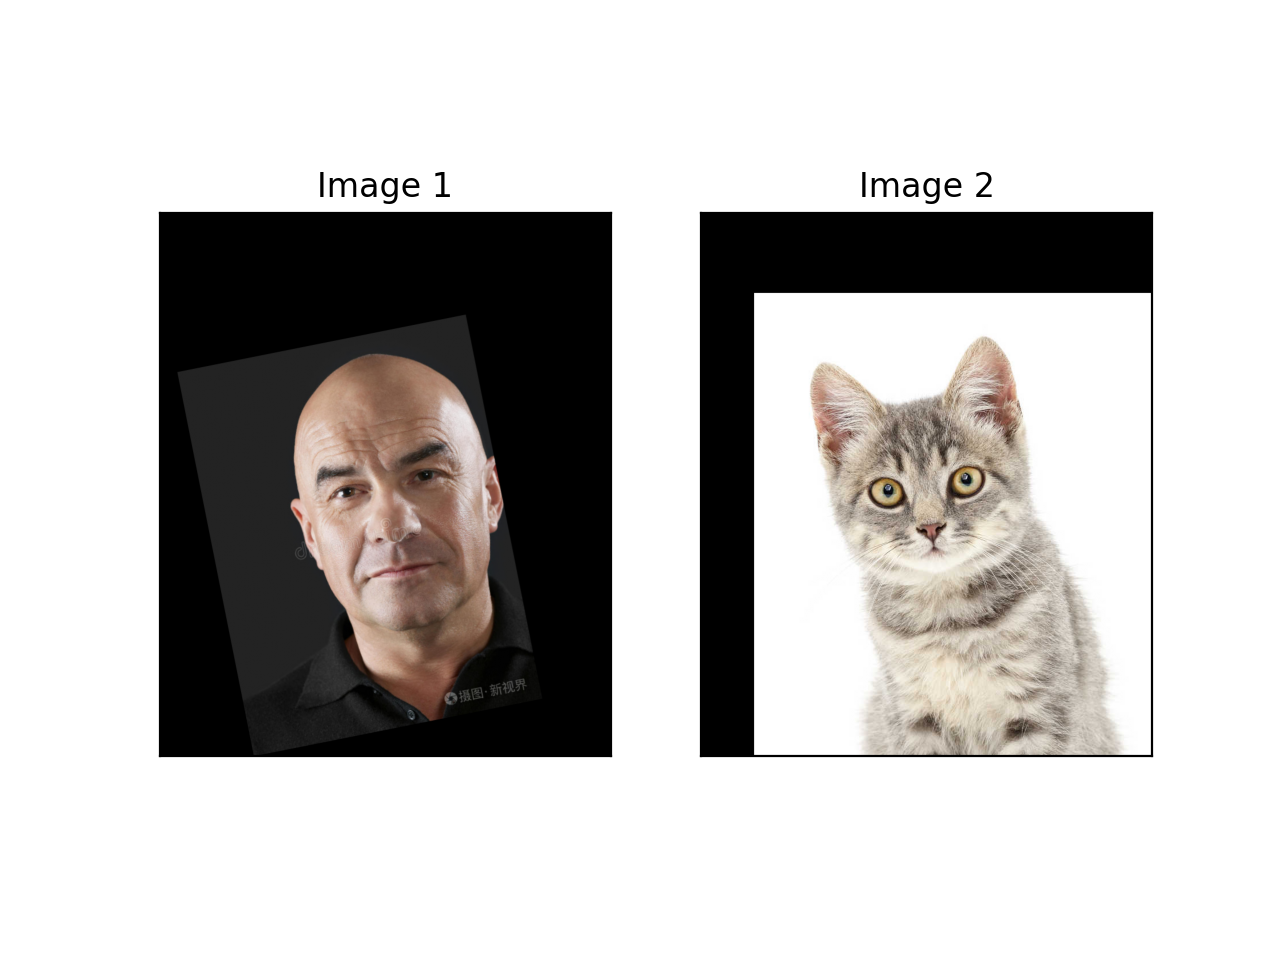

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [9]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here
    ksize1 = np.int64(np.ceil(sigma_low)*6+1)
    fil1 = cv2.getGaussianKernel(ksize1, sigma_low) # 1D kernel
    fil1 = fil1*np.transpose(fil1) # 2D kernel by outer product
    ditong = cv2.filter2D(im1, -1, fil1)
#     ditong = cv2.GaussianBlur(im1,(0,0),sigmaX = sigma_low)
    ksize2 = np.int64(np.ceil(sigma_high)*6+1)
    fil2 = cv2.getGaussianKernel(ksize2, sigma_low) # 1D kernel
    fil2 = fil2*np.transpose(fil2) # 2D kernel by outer product
    sub = cv2.filter2D(im2, -1, fil2)
    gaotong = cv2.subtract(im2,sub)
    res = cv2.add(ditong,gaotong)
    return res

In [22]:
sigma_low = 7 # choose parameters that work for your images
sigma_high = 2.5

im_hybrid = hybridImage(im1,im2,sigma_low, sigma_high)


<IPython.core.display.Javascript object>


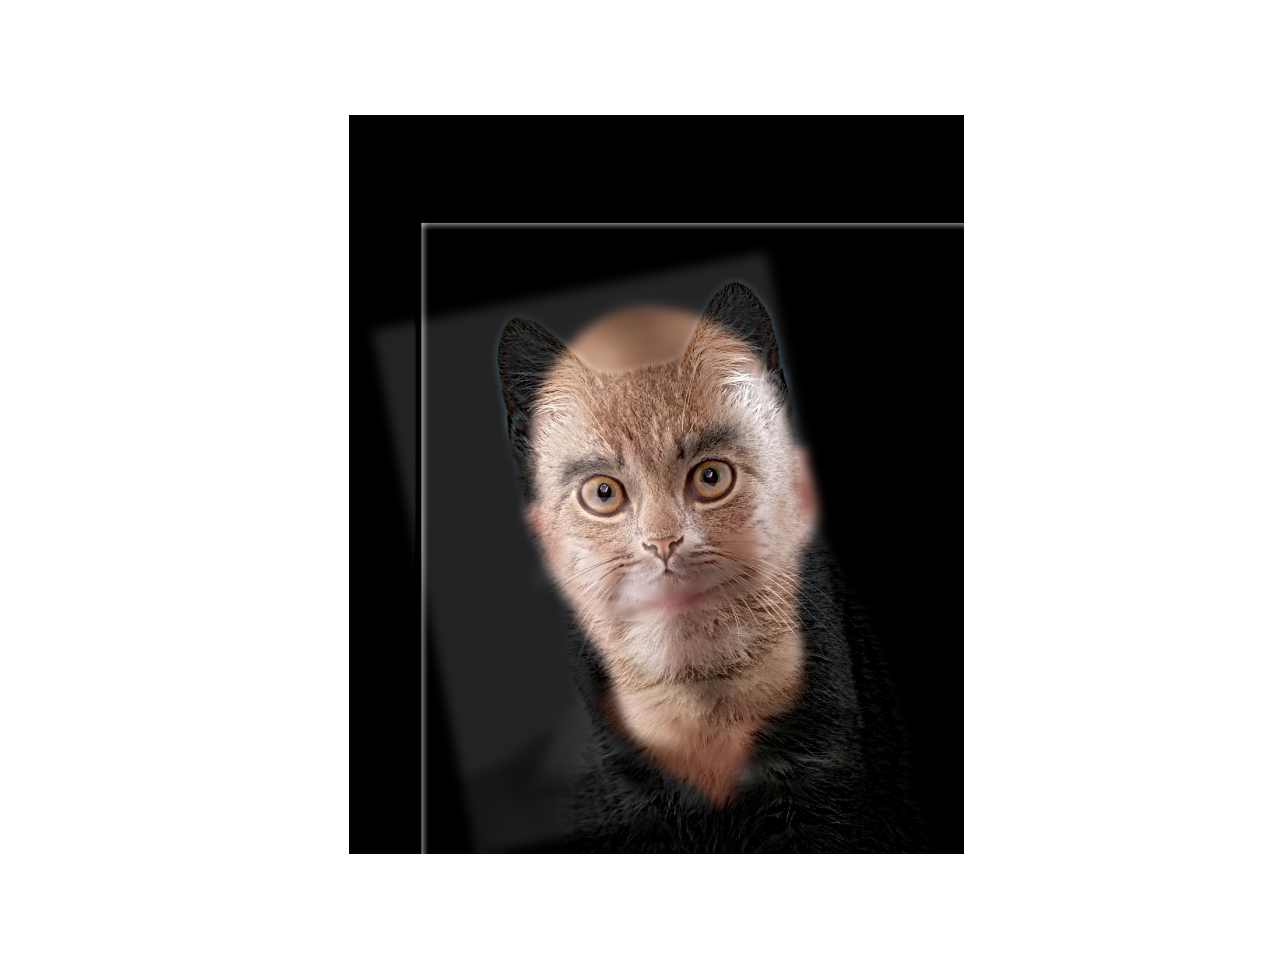

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [23]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift